In [1]:
#import
import torch
import torchvision.models as models
import matplotlib.pyplot as plt                        
%matplotlib inline 

from PIL import Image
from torchvision import transforms

In [2]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

In [3]:
# define models
model1 = models.vgg16(   pretrained=True)
model2 = models.resnet50(pretrained=True)

In [4]:
def predict(model,img_path):
    input_image = Image.open(img_path)
    #preprocess = transforms.Compose([transforms.Resize(size=(244, 244)),
    #                                 transforms.ToTensor()])
    preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    input_tensor = preprocess(input_image)
    input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model
    
    with torch.no_grad():
        output = model(input_batch)
    #output = model(input_batch)
    
    class_ind = torch.argmax(output[0]).item() 
    
    return class_ind

path: lfw/Spencer_Abraham/Spencer_Abraham_0014.jpg
class index in model1: 834
class index in model2: 906


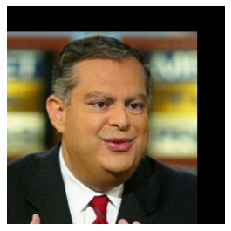

path: dogImages/valid/114.Otterhound/Otterhound_07421.jpg
class index in model1: 175
class index in model2: 175


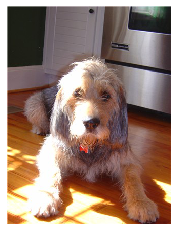

In [5]:
# Test on random images
nr = np.random.randint(0,1000)
path = [human_files[nr], dog_files[nr]]
for p in path:
    print('path:',p)
    print('class index in model1:',predict(model1,p))
    print('class index in model2:',predict(model1,p))
    plt.imshow(Image.open(p))
    plt.axis('off')
    plt.show()